## **Name:** First Last

## **Computing ID:** ID

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

# Lab 4: Unsupervised Learning on Tweets (100 Points)

## **Due December 1st, 2025 at 11:59PM EST**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1vbCuijewyF49JTfa0t1u0qBRypS_qF8N?usp=sharing) 

You are a junior data scientist at **Bwitter Incorporated**, a massive social media platform that maintains a portfolio of millions of users internationally. Approximately 11 days ago, Bwitter recieved massive influx of traffic that many users and company leaders are now attributing to a [**bot attack**](https://en.wikipedia.org/wiki/Social_bot).

Your boss, Jim Ryan, has asked you to implement 2 models in the unsupervised learning family, **K-means clustering** and **Principal Component Analysis (PCA)**, on a subset of social media users on your platform to identify likely bots.

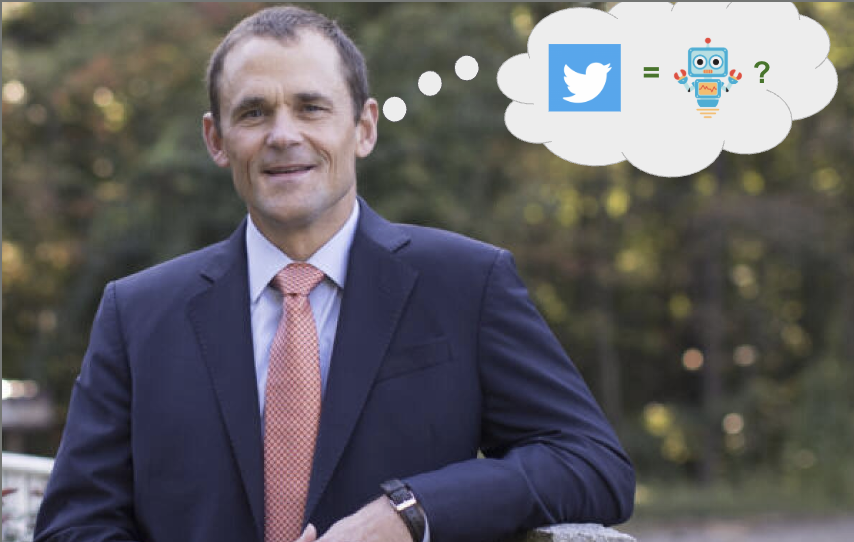

You will utilize the skills you have gained over the semester to build, explore, and evaluate your models. As always, you will be graded on your model building and interpretation of  results rather than specific performance. However, there is an optional extra credit opportunity if you wish to extend the unsupervised models you have applied.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*h-lAg5H-ZNDRXxX2.png)

# **Real World Context**

Bot detection is a common unstructured text task. The dataset in this lab is derived from thousands of real tweets scraped in the 2010s with the Twitter API. Of the features provided, some notable ones include:


* **Tweet_text:** A difficult to encode raw text column with the original content of the tweet. It includes unicode, special characters, and sometimes non-english.
* **Count Columns:** Columns that has extracted the word, adverb, verb, noun, pronoun, punctuation, and special characters in the tweet body.
* **Sentiment Columns:** Columns that mention word ratios that are positive, negative, or ratio from the tweet body.
* **Followers and Following:** Columns that compute the amount of accounts a user has as followers or a user is following respectively.
* **Location:** Self-provided location string that may be a real location or not.
* **Real_Location:** 1 if Location seems plausible, 0 if not, -1 if missing.
* **Real_Location:** 1 if Location seems plausible, 0 if not, -1 if missing.
* **Bot or Not:** A column hidden from you that contained a Twitter given label of a social media bot. This column is filled with NaNs when you read the CSV in to prevent you from seeing the true label of a tweet.


Interestingly, **only about 15% of this data is identified as bots**. Although the target feature is hidden from you, you now have many starting points for an unsupervised model analysis!

### To guide your analysis, also review the graphic below which summarizes the data using the Bot or Not label. As expected, bots often have extreme maximum ranges of values even when their means do not differ notably from human accounts. **You do not have access to the Bot or Not label in this lab. However, you can use the graphic below to explain and justify your results!**
### Less obvious bots might present themselves in normal ranges of these features - think about how might you use unsupervised learning to help differentiate humans and botnets.

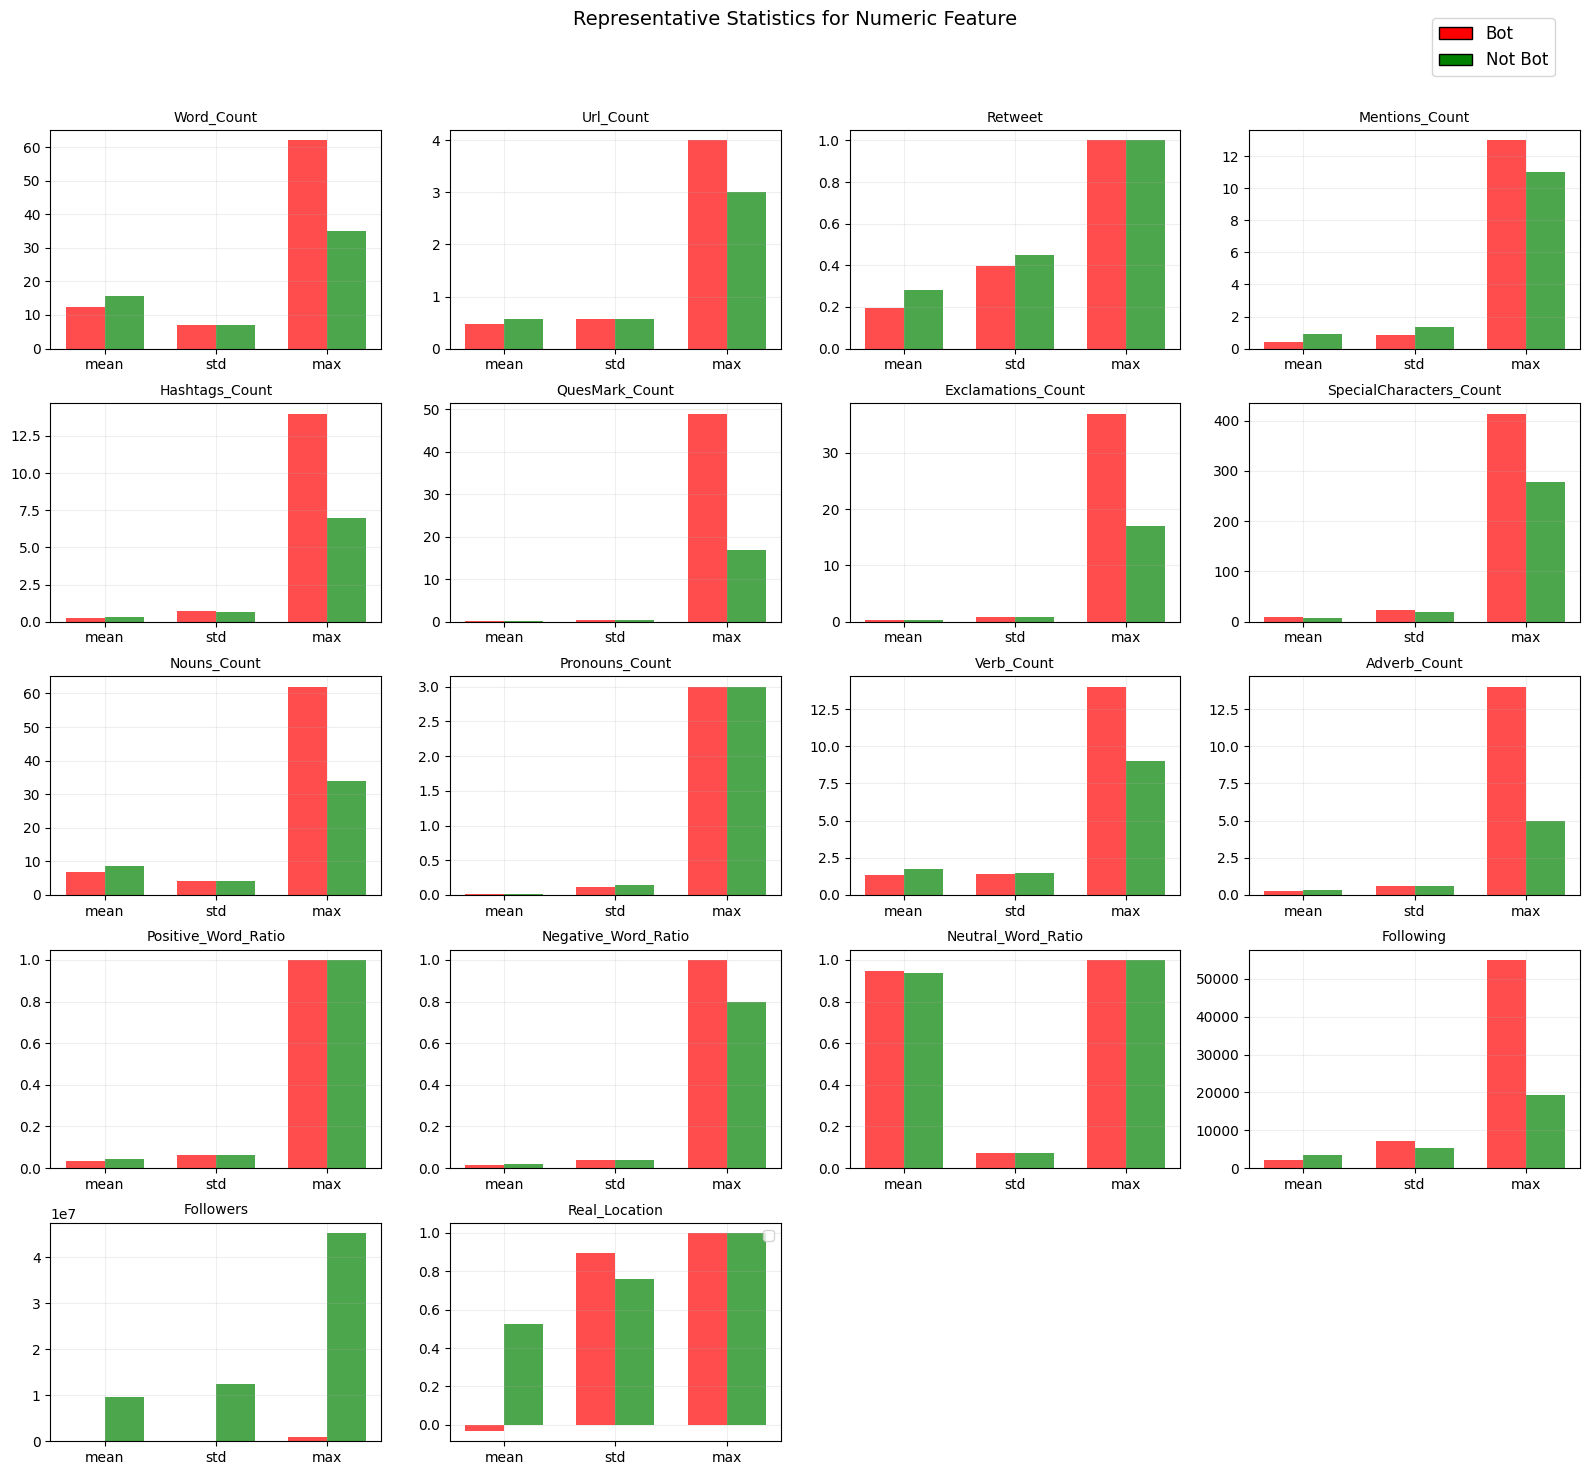

# **Part 1: EDA and Data Cleaning (10 points)**

Load in the provided CSV "Tweets.csv" and observe the columns below. The original binary target column "Bot Or Not" **has been removed** and now only contains NaNs.

In [9]:
df_raw = pd.read_csv("clean_tweets.csv")
df_raw = df_raw.sample(frac=1, random_state=3001)
df = df_raw

In [10]:
df.head()

Tweet_id  Tweet_created_at Twitter_User_Name Twitter_Account  \
222015  1.042100e+18  18-09-2018 17:08        James Wong      Botanygeek   
238438  1.062740e+18  14-11-2018 16:16  Newfound Planets  I_Find_Planets   
13306   1.049800e+17  20-08-2011 18:17      Jesus Cristo  itsJesusCristo   
102937  8.314880e+17  14-02-2017 13:01     Kris Anderson  KrisAndersonTV   
26855   9.380940e+17  05-12-2017 17:11       Sarah Nagem     sarah_nagem   

                                 Twitter_User_Description  \
222015  British-Malaysian botanist with a special inte...   
238438  What distant worlds may be like. Or not. I'll ...   
13306   Eu sou o caminho, e a verdade e a vida. Não se...   
102937  Father of three amazing sons & loving husband....   
26855   Assistant metro editor at The News & Observer....   

                                               Tweet_text  Word_Count  \
222015  @yungcav @contrarybass Nope. Not true. It\xe2\...          16   
238438  You have discovered a planet. It is peach. It ...          21   
13306   Eu te ressuscito! RT @macarena_rs: ''quer mais...          15   
102937           @SibilioW @cdelcampon7 @7News thanks Bob           5   
26855   @jonmalexander @Blovee_20 Here it is: https://...           6   

        Url_Count  Retweet  Mentions_Count  ...  Verb_Count  Adverb_Count  \
222015          0        0               2  ...           1             2   
238438          0        0               0  ...           4             0   
13306           0        0               0  ...           0             0   
102937          0        0               3  ...           1             0   
26855           1        0               2  ...           0             0   

        Positive_Word_Ratio  Negative_Word_Ratio  Neutral_Word_Ratio  \
222015             0.045455             0.000000            0.954545   
238438             0.037037             0.037037            0.925926   
13306              0.000000             0.000000            1.000000   
102937             0.125000             0.000000            0.875000   
26855              0.000000             0.000000            1.000000   

        Following  Followers                 Location  Real_Location  \
222015       3882     179800                      NaN           -1.0   
238438        183       9998  Out there in the Cosmos            0.0   
13306           3       1086           Ceu do Twitter            0.0   
102937      20500      30100                  Florida            1.0   
26855        1314       1571                  Raleigh            1.0   

        bot_or_not  
222015         NaN  
238438         NaN  
13306          NaN  
102937         NaN  
26855          NaN  

[5 rows x 26 columns]

Many rows in the dataset are clearly bots. Let's filter rows that contain "bot" in the usename or account.

In [6]:
df[df['Twitter_Account'].str.contains("bot")].head(5)

Tweet_id  Tweet_created_at Twitter_User_Name  Twitter_Account  \
8260    9.108540e+17  21-09-2017 13:13       Robots Rule       RobotzRule   
109012  1.000340e+18  26-05-2018 11:43         Quilt Bot      a_quilt_bot   
187262  1.068940e+18  01-12-2018 18:31   Hacker News Bot    hackernewsbot   
72965   7.435730e+17  16-06-2016 22:36   portmanteau_bot  portmanteau_bot   
152876  2.743770e+17  30-11-2012 05:00       Beckett Bot       beckettbot   

                                 Twitter_User_Description  \
8260    I love robots, and I retweet stories about the...   
109012  Tweet pictures at me and I'll try to reproduce...   
187262         Tweeting the hottest from Hacker News (YC)   
72965   portmanteaus, portmanteaus everywhere // by @t...   
152876                                       by @dontsave   

                                               Tweet_text  Word_Count  \
8260    RT @TRADOC: The #USArmy is developing robot re...          14   
109012                @CommonsBot https://t.co/HMh1r3JheV           2   
187262  Psychology\xe2\x80\x99s Replication Crisis Is ...           6   
72965                                        outrightness           1   
152876                    RT @Syafa_Queen: I will go on..           6   

        Url_Count  Retweet  Mentions_Count  ...  Verb_Count  Adverb_Count  \
8260            2        1               1  ...           2             0   
109012          1        0               1  ...           0             0   
187262          1        0               0  ...           0             0   
72965           0        0               0  ...           0             0   
152876          0        1               0  ...           1             0   

        Positive_Word_Ratio  Negative_Word_Ratio  Neutral_Word_Ratio  \
8260                    0.0                0.000               1.000   
109012                  0.0                0.000               1.000   
187262                  0.0                0.125               0.875   
72965                   0.0                0.000               1.000   
152876                  0.0                0.000               1.000   

        Following  Followers       Location  Real_Location  bot_or_not  
8260           24       2198  The Internetz            0.0         NaN  
109012          2       2828    Swatchspace            0.0         NaN  
187262          0      23700      Internetz            0.0         NaN  
72965           0       1960            NaN           -1.0         NaN  
152876          0         79            NaN           -1.0         NaN  

[5 rows x 26 columns]

In [7]:
# A few likely bot messages
df[df['Twitter_Account'].str.contains("bot")]["Tweet_text"].tolist()[0:5]

['RT @TRADOC: The #USArmy is developing robot resupply vehicles https://t.co/3KQMcePMep via @ArmyTimes #MultiDomainBattle https://t.co/lMZ639\\xe2\\x80\\xa6',
 '@CommonsBot https://t.co/HMh1r3JheV',
 'Psychology\\xe2\\x80\\x99s Replication Crisis Is Real https://t.co/Pi7RlWKezU',
 'outrightness',
 'RT @Syafa_Queen: I will go on..']

## **Question 1 (10 points):**
## Unstructured text columns may prove hard to preprocess for unsupervised learning and need standardizing. Run the following data cleaning steps in order to ensure you can still extract information from unstructured text:

## **These steps have been completed for you! You only need to run the cell and focus on understanding the code provided.**

### **1. Standardizing text usually implies lowercasing it. Run this cell to lowercase your text columns: Twitter_User_Name, Twitter_Account, Twitter_User_Description, Tweet_id, Tweet_text, and Location**

In [ ]:
lower_cols = ['Twitter_User_Name',
    'Twitter_Account',
    'Twitter_User_Description',
    'Tweet_id',
    'Tweet_text',
    'Location']

for col in lower_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower()
df.head(3)

Tweet_id  Tweet_created_at Twitter_User_Name Twitter_Account  \
222015   1.0421e+18  18-09-2018 17:08        james wong      botanygeek   
238438  1.06274e+18  14-11-2018 16:16  newfound planets  i_find_planets   
13306    1.0498e+17  20-08-2011 18:17      jesus cristo  itsjesuscristo   

                                 Twitter_User_Description  \
222015  british-malaysian botanist with a special inte...   
238438  what distant worlds may be like. or not. i'll ...   
13306   eu sou o caminho, e a verdade e a vida. não se...   

                                               Tweet_text  Word_Count  \
222015  @yungcav @contrarybass nope. not true. it\xe2\...          16   
238438  you have discovered a planet. it is peach. it ...          21   
13306   eu te ressuscito! rt @macarena_rs: ''quer mais...          15   

        Url_Count  Retweet  Mentions_Count  ...  Verb_Count  Adverb_Count  \
222015          0        0               2  ...           1             2   
238438          0        0               0  ...           4             0   
13306           0        0               0  ...           0             0   

        Positive_Word_Ratio  Negative_Word_Ratio  Neutral_Word_Ratio  \
222015             0.045455             0.000000            0.954545   
238438             0.037037             0.037037            0.925926   
13306              0.000000             0.000000            1.000000   

        Following  Followers                 Location  Real_Location  \
222015       3882     179800                      nan           -1.0   
238438        183       9998  out there in the cosmos            0.0   
13306           3       1086           ceu do twitter            0.0   

        bot_or_not  
222015         NaN  
238438         NaN  
13306          NaN  

[3 rows x 26 columns]

### **2.  Many people create bots on Twitter for helpful reasons. They usually create usernames with the word "bot" in them like you saw above.**

### **Run this cell to make a new column called "mentions_bot" that is 1 if 'bot' is mentioned in the Twitter_User_Name OR Twitter_Account columns.**

### **While there may be some false positives (ie: botany), this will be a very helpful column to use as a reference for unsupervised learning.**

In [12]:
df['mentions_bot'] = (df['Twitter_User_Name'].str.contains("bot", na=False) | df['Twitter_Account'].str.contains("bot", na=False)).astype(int)
df.head(3)

Tweet_id  Tweet_created_at Twitter_User_Name Twitter_Account  \
222015  1.042100e+18  18-09-2018 17:08        James Wong      Botanygeek   
238438  1.062740e+18  14-11-2018 16:16  Newfound Planets  I_Find_Planets   
13306   1.049800e+17  20-08-2011 18:17      Jesus Cristo  itsJesusCristo   

                                 Twitter_User_Description  \
222015  British-Malaysian botanist with a special inte...   
238438  What distant worlds may be like. Or not. I'll ...   
13306   Eu sou o caminho, e a verdade e a vida. Não se...   

                                               Tweet_text  Word_Count  \
222015  @yungcav @contrarybass Nope. Not true. It\xe2\...          16   
238438  You have discovered a planet. It is peach. It ...          21   
13306   Eu te ressuscito! RT @macarena_rs: ''quer mais...          15   

        Url_Count  Retweet  Mentions_Count  ...  Positive_Word_Ratio  \
222015          0        0               2  ...             0.045455   
238438          0        0               0  ...             0.037037   
13306           0        0               0  ...             0.000000   

        Negative_Word_Ratio  Neutral_Word_Ratio  Following  Followers  \
222015             0.000000            0.954545       3882     179800   
238438             0.037037            0.925926        183       9998   
13306              0.000000            1.000000          3       1086   

                       Location  Real_Location  bot_or_not  \
222015                      NaN           -1.0         NaN   
238438  Out there in the Cosmos            0.0         NaN   
13306            Ceu do Twitter            0.0         NaN   

        followers_following_ratio  mentions_bot  
222015                  46.304404             0  
238438                  54.336957             0  
13306                  271.500000             0  

[3 rows x 28 columns]

### **3. Run this cell to label encode the Twitter_User_Name and Twitter_Account columns.**

In [ ]:
le_user = LabelEncoder()
le_account = LabelEncoder()

df['Twitter_User_Name_encoded'] = le_user.fit_transform(df['Twitter_User_Name'].astype(str))
df['Twitter_Account_encoded']   = le_account.fit_transform(df['Twitter_Account'].astype(str))
df.head(3)

Tweet_id  Tweet_created_at Twitter_User_Name Twitter_Account  \
222015   1.0421e+18  18-09-2018 17:08        james wong      botanygeek   
238438  1.06274e+18  14-11-2018 16:16  newfound planets  i_find_planets   
13306    1.0498e+17  20-08-2011 18:17      jesus cristo  itsjesuscristo   

                                 Twitter_User_Description  \
222015  british-malaysian botanist with a special inte...   
238438  what distant worlds may be like. or not. i'll ...   
13306   eu sou o caminho, e a verdade e a vida. não se...   

                                               Tweet_text  Word_Count  \
222015  @yungcav @contrarybass nope. not true. it\xe2\...          16   
238438  you have discovered a planet. it is peach. it ...          21   
13306   eu te ressuscito! rt @macarena_rs: ''quer mais...          15   

        Url_Count  Retweet  Mentions_Count  ...  Negative_Word_Ratio  \
222015          0        0               2  ...             0.000000   
238438          0        0               0  ...             0.037037   
13306           0        0               0  ...             0.000000   

        Neutral_Word_Ratio  Following  Followers                 Location  \
222015            0.954545       3882     179800                      nan   
238438            0.925926        183       9998  out there in the cosmos   
13306             1.000000          3       1086           ceu do twitter   

        Real_Location  bot_or_not  mentions_bot  Twitter_User_Name_encoded  \
222015           -1.0         NaN             1                         40   
238438            0.0         NaN             0                         64   
13306             0.0         NaN             0                         46   

        Twitter_Account_encoded  
222015                       18  
238438                       36  
13306                        38  

[3 rows x 29 columns]

### **4. Run this cell to cast Tweet_id as an integer column.**

In [ ]:
df['Tweet_id'] = pd.to_numeric(df['Tweet_id'], errors='coerce').astype("Int64")
df.head(3)

Tweet_id  Tweet_created_at Twitter_User_Name  \
222015  1042100000000000000  18-09-2018 17:08        james wong   
238438  1062740000000000000  14-11-2018 16:16  newfound planets   
13306    104980000000000000  20-08-2011 18:17      jesus cristo   

       Twitter_Account                           Twitter_User_Description  \
222015      botanygeek  british-malaysian botanist with a special inte...   
238438  i_find_planets  what distant worlds may be like. or not. i'll ...   
13306   itsjesuscristo  eu sou o caminho, e a verdade e a vida. não se...   

                                               Tweet_text  Word_Count  \
222015  @yungcav @contrarybass nope. not true. it\xe2\...          16   
238438  you have discovered a planet. it is peach. it ...          21   
13306   eu te ressuscito! rt @macarena_rs: ''quer mais...          15   

        Url_Count  Retweet  Mentions_Count  ...  Negative_Word_Ratio  \
222015          0        0               2  ...             0.000000   
238438          0        0               0  ...             0.037037   
13306           0        0               0  ...             0.000000   

        Neutral_Word_Ratio  Following  Followers                 Location  \
222015            0.954545       3882     179800                      nan   
238438            0.925926        183       9998  out there in the cosmos   
13306             1.000000          3       1086           ceu do twitter   

        Real_Location  bot_or_not  mentions_bot  Twitter_User_Name_encoded  \
222015           -1.0         NaN             1                         40   
238438            0.0         NaN             0                         64   
13306             0.0         NaN             0                         46   

        Twitter_Account_encoded  
222015                       18  
238438                       36  
13306                        38  

[3 rows x 29 columns]

### **5. Bots tend to follow more accounts than they have followers. Take a look at the visual below to understand if this is true for your data.**

###**Then, run the code below to add a column for the ratio of followers to following.**

Visual on median following ratios:

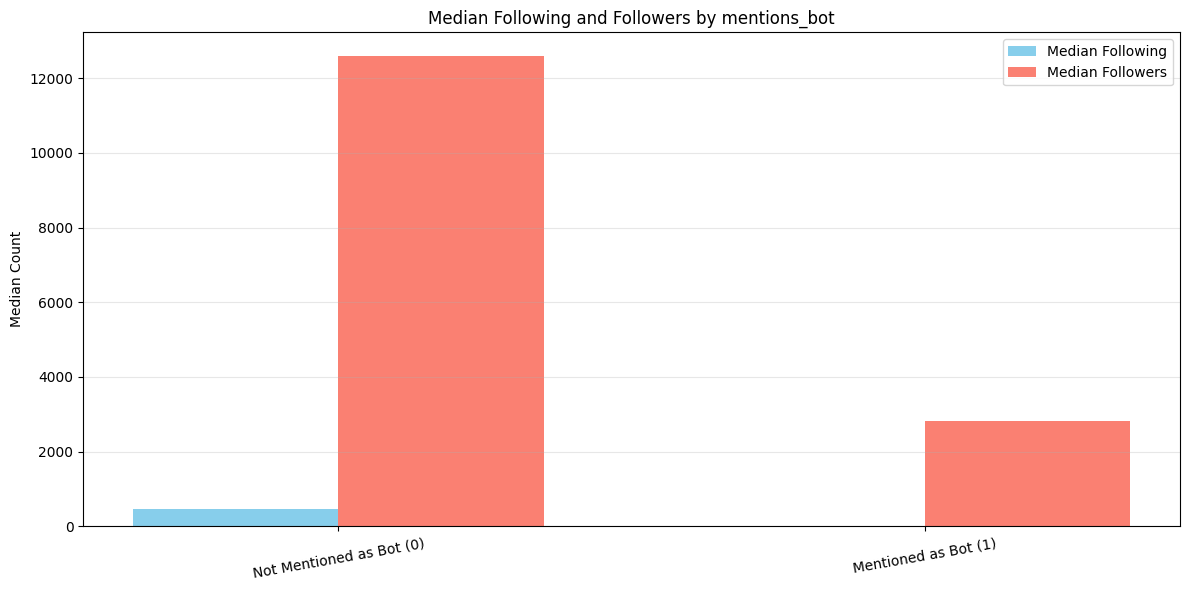

In [13]:
# Add ratio column
df['followers_following_ratio'] = df['Followers'] / (df['Following'] + 1)
df.head(3)

Tweet_id  Tweet_created_at Twitter_User_Name Twitter_Account  \
222015  1.042100e+18  18-09-2018 17:08        James Wong      Botanygeek   
238438  1.062740e+18  14-11-2018 16:16  Newfound Planets  I_Find_Planets   
13306   1.049800e+17  20-08-2011 18:17      Jesus Cristo  itsJesusCristo   

                                 Twitter_User_Description  \
222015  British-Malaysian botanist with a special inte...   
238438  What distant worlds may be like. Or not. I'll ...   
13306   Eu sou o caminho, e a verdade e a vida. Não se...   

                                               Tweet_text  Word_Count  \
222015  @yungcav @contrarybass Nope. Not true. It\xe2\...          16   
238438  You have discovered a planet. It is peach. It ...          21   
13306   Eu te ressuscito! RT @macarena_rs: ''quer mais...          15   

        Url_Count  Retweet  Mentions_Count  ...  Positive_Word_Ratio  \
222015          0        0               2  ...             0.045455   
238438          0        0               0  ...             0.037037   
13306           0        0               0  ...             0.000000   

        Negative_Word_Ratio  Neutral_Word_Ratio  Following  Followers  \
222015             0.000000            0.954545       3882     179800   
238438             0.037037            0.925926        183       9998   
13306              0.000000            1.000000          3       1086   

                       Location  Real_Location  bot_or_not  \
222015                      NaN           -1.0         NaN   
238438  Out there in the Cosmos            0.0         NaN   
13306            Ceu do Twitter            0.0         NaN   

        followers_following_ratio  mentions_bot  
222015                  46.304404             0  
238438                  54.336957             0  
13306                  271.500000             0  

[3 rows x 28 columns]

### **5. Finally, Tweet_created_at is a string date which can be difficult to encode. Data scientists often convert dates into seconds because they are easier to process.**

### **Run the code below to**
###(1) Convert Tweet_created_at from a string to a datetime type  

### (2) Convert datetime to seconds, which is an **integer**

### Epoch time is very frequently used to convert date objects into a parseable format for modelling!

Reference: https://en.wikipedia.org/wiki/Unix_time

In [ ]:
df['Tweet_created_at'] = pd.to_datetime(df['Tweet_created_at'], errors='coerce')
df['Tweet_created_at_epoch'] = df['Tweet_created_at'].astype('int64') // 10**9

/tmp/ipython-input-1879415004.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Tweet_created_at'] = pd.to_datetime(df['Tweet_created_at'], errors='coerce')


### **6. Run the cell below to drop the original unecoded columns and text columns. This cell will also standardize the remaining features.**

In [ ]:
df = df.drop(columns=["Twitter_User_Description", "Location", "Tweet_text",
                      "Twitter_User_Name", "Twitter_Account", "Tweet_created_at",
                      "Following", "Followers", "bot_or_not"], errors='ignore')

In [ ]:
X = df.select_dtypes(include='number').copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Your preprocessing is complete! You will use X_scaled as your input data for your unsupervised models.**

In [ ]:
X_scaled

array([[ 0.91570737,  0.42924789, -0.87207354, ..., -1.00625431,
        -0.12780017,  0.9154831 ],
       [ 0.99114844,  1.12094737, -0.87207354, ..., -0.2961261 ,
        -0.12779647,  0.99090705],
       [-2.50955078,  0.29090799, -0.87207354, ..., -0.21722297,
        -0.12769637, -2.50848789],
       ...,
       [ 0.61332907, -1.50751065,  0.89414418, ...,  0.72961464,
        -0.1274083 ,  0.61322368],
       [ 0.88716112,  0.98260747, -0.87207354, ..., -0.2961261 ,
        -0.12779647,  0.88696695],
       [ 0.3934425 ,  0.84426758,  0.89414418, ...,  1.00577561,
        -0.12778099,  0.39341955]])

# **Part 2: K-Means Clustering (10 points)**

## **Question 1 (5 points):**
## Run the cell below to build an elbow diagnostic below for k=1 to 50 clusters. This may take a while to run but builds character as a data scientist. Write the optimal k in a text cell.

In [ ]:
inertia = []
K = range(1, 50)

for k in K:
    km = KMeans(n_clusters=k, random_state=3001)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Plot for K-Means")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.grid(alpha=0.3)
plt.show()

**The optimal k is...**

## **Question 2 (5 points):**

## Run the cells below to create a K-Means Clustering model with your optimal.

## Then, run the remaining cell to print your cluster sizes and add your cluster assignments to your DataFrame.

In [ ]:
k = 0 # Change me!

kmeans = KMeans(n_clusters=k, random_state=3001)
labels = kmeans.fit_predict(X_scaled)

In [ ]:
df['cluster'] = labels
print("Cluster sizes:")
print(df['cluster'].value_counts())

Cluster sizes:
cluster
2    69815
1    56160
5    41780
6    38963
4    21205
3    20562
0    16640
Name: count, dtype: int64


# **Part 3: Principal Component Analysis (20 Points)**

## **Question 1 (10 points):**
## Display any PCA diagnostic that allows you to determine the minimum number components to explain 95% cumulative variance in **X_scaled**. An example visual is shown that you may want to replicate.

## Write the minimum number components in a text cell.

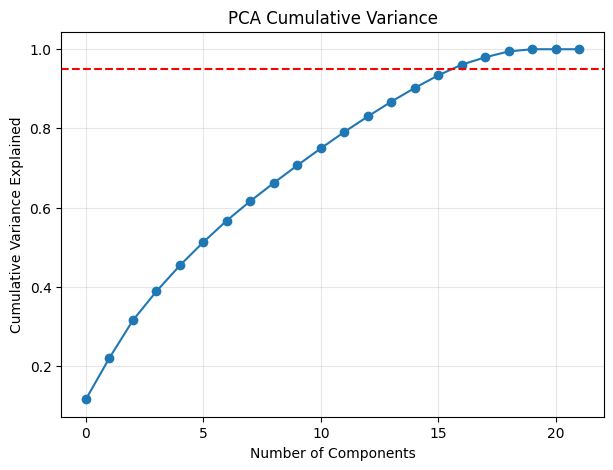

Components needed for 95% variance: 17


In [ ]:
# Diagnostic plot here

**The minimum number is...**

## **Question 2 (10 points):**
## Run PCA with the minimum number components on **X_scaled**. Store your fit_transform object in a variable called **X_pca**. Then, run the cell below to extract the first 5 principal components and create columns for them in your DataFrame.

In [ ]:
# PCA code

In [ ]:
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]
df['PC3'] = X_pca[:,2]
df['PC4'] = X_pca[:,3]
df['PC5'] = X_pca[:,4]

# **Part 4: Bot Detection (60 Points)**

## Your DataFrame now has columns for K-means cluster and PCs 1 through 5. The final part of the lab will involve visualizing your results and identifying likely bots based on the data you've extracted.

## While you don't have the ground truth label - you do have a column you created called **mentions_bot**! This column will be very useful in identifying any **remaining bots**. Think through the remaining interpretation steps intentionally.

In [8]:
df.head(5)

Tweet_id  Tweet_created_at Twitter_User_Name Twitter_Account  \
222015  1.042100e+18  18-09-2018 17:08        James Wong      Botanygeek   
238438  1.062740e+18  14-11-2018 16:16  Newfound Planets  I_Find_Planets   
13306   1.049800e+17  20-08-2011 18:17      Jesus Cristo  itsJesusCristo   
102937  8.314880e+17  14-02-2017 13:01     Kris Anderson  KrisAndersonTV   
26855   9.380940e+17  05-12-2017 17:11       Sarah Nagem     sarah_nagem   

                                 Twitter_User_Description  \
222015  British-Malaysian botanist with a special inte...   
238438  What distant worlds may be like. Or not. I'll ...   
13306   Eu sou o caminho, e a verdade e a vida. Não se...   
102937  Father of three amazing sons & loving husband....   
26855   Assistant metro editor at The News & Observer....   

                                               Tweet_text  Word_Count  \
222015  @yungcav @contrarybass Nope. Not true. It\xe2\...          16   
238438  You have discovered a planet. It is peach. It ...          21   
13306   Eu te ressuscito! RT @macarena_rs: ''quer mais...          15   
102937           @SibilioW @cdelcampon7 @7News thanks Bob           5   
26855   @jonmalexander @Blovee_20 Here it is: https://...           6   

        Url_Count  Retweet  Mentions_Count  ...  Verb_Count  Adverb_Count  \
222015          0        0               2  ...           1             2   
238438          0        0               0  ...           4             0   
13306           0        0               0  ...           0             0   
102937          0        0               3  ...           1             0   
26855           1        0               2  ...           0             0   

        Positive_Word_Ratio  Negative_Word_Ratio  Neutral_Word_Ratio  \
222015             0.045455             0.000000            0.954545   
238438             0.037037             0.037037            0.925926   
13306              0.000000             0.000000            1.000000   
102937             0.125000             0.000000            0.875000   
26855              0.000000             0.000000            1.000000   

        Following  Followers                 Location  Real_Location  \
222015       3882     179800                      NaN           -1.0   
238438        183       9998  Out there in the Cosmos            0.0   
13306           3       1086           Ceu do Twitter            0.0   
102937      20500      30100                  Florida            1.0   
26855        1314       1571                  Raleigh            1.0   

        bot_or_not  
222015         NaN  
238438         NaN  
13306          NaN  
102937         NaN  
26855          NaN  

[5 rows x 26 columns]

## **Question 1 (10 points):**
## Run the below code to merge your cluster and PC data into the original data. This will create a new dataframe called plot_df.

In [ ]:
# Unsupervised output
df_unsup = df[['Tweet_id', 'cluster', 'PC1','PC2','PC3','PC4','PC5']]
df_unsup['Tweet_id']  = df_unsup['Tweet_id'].astype(str)

# Merge data
df_original = pd.read_csv("clean_tweets.csv")
df_original['Tweet_id'] = pd.to_numeric(df_original['Tweet_id'], errors='coerce').astype("Int64")
df_original['mentions_bot'] = (df_original['Twitter_User_Name'].str.contains("bot", na=False) | df_original['Twitter_Account'].str.contains("bot", na=False)).astype(int)
df_original['Tweet_id'] = df_original['Tweet_id'].astype(str)

plot_df = df_original.merge(df_unsup, on='Tweet_id', how='left')
plot_df = plot_df.sample(frac=1, random_state=3001)
plot_df.head(5)

/tmp/ipython-input-3536242270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unsup['Tweet_id']  = df_unsup['Tweet_id'].astype(str)


Tweet_id  Tweet_created_at  Twitter_User_Name  \
289489   1018690000000000000  16-07-2018 03:08      Darius Kazemi   
1302502  1042090000000000000  18-09-2018 16:37   Subrahmanyam KVJ   
1497551  1065270000000000000  21-11-2018 16:00  Security News Bot   
281135    405429000000000000  26-11-2013 20:13            LOUDBOT   
1333768  1029400000000000000  14-08-2018 16:02     Andrew McMahon   

         Twitter_Account                           Twitter_User_Description  \
289489   tinysubversions  I make weird internet art. I've mostly left Tw...   
1302502            SuB8u  Technology | Science | Business | Media | Inte...   
1497551  SecurityNewsbot  Tweeting all things #InfoSec #Cybercrime #DDoS...   
281135           LOUDBOT           I'LL JUST PUT THIS PLUTONIUM IN THE SINK   
1333768    andrewmcmahon  New album Upside Down Flowers ft. Ohio out now...   

                                                Tweet_text  Word_Count  \
289489                        103. https://t.co/KqpyuRQRCe           2   
1302502  RT @geoffreyfowler: My favorite #iOS12 additio...          17   
1497551  TrickBot\xe2\x80\x99s Bigger Bag of Tricks htt...           7   
281135            WE'RE NO STRANGERS TO LOVE YOU KNOW THAT           8   
1333768  Pleased to announce the 9th annual @DearJackHQ...          21   

         Url_Count  Retweet  Mentions_Count  ...               Location  \
289489           1        0               0  ...               Scotland   
1302502          0        1               3  ...              127.0.0.2   
1497551          1        0               0  ...               Internet   
281135           0        0               0  ...  I'm from the internet   
1333768          1        0               1  ...            Southern CA   

         Real_Location  bot_or_not  mentions_bot  cluster       PC1       PC2  \
289489             1.0         NaN             0        6 -1.096452  1.406877   
1302502            0.0         NaN             0        2  2.281224  1.248259   
1497551            0.0         NaN             1        1  0.200733  1.850991   
281135             0.0         NaN             0        0 -2.134526 -3.438382   
1333768            1.0         NaN             0        2  3.410134  1.065824   

              PC3       PC4       PC5  
289489  -0.208093 -2.809745 -0.506190  
1302502  0.892084  0.652624  0.468444  
1497551  1.864467  1.436735 -0.258871  
281135   1.481524  2.638608  0.189666  
1333768 -1.551110 -0.920275  0.171803  

[5 rows x 33 columns]

## Run the below code to randomly sample 10,000 points from your data for plotting. Because plot_df is very high dimensional, you will only want to plot a subset of the data at a time.

In [ ]:
# Yikes!
plot_df.shape

(1832193, 36)

In [ ]:
plot_df = plot_df.sample(n=min(10_000, len(plot_df)), random_state=3001)
plot_df.head(3)

Tweet_id  Tweet_created_at Twitter_User_Name  \
1569664  1072320000000000000  11-12-2018 02:29    Aaron Chewning   
697368    979609000000000000  30-03-2018 06:40         DJ SCREAM   
1227077   313495000000000000  18-03-2013 03:40           God Bot   

        Twitter_Account                           Twitter_User_Description  \
1569664   AaronChewning  "Good for you, Aaron" - @gqmagazine. Loser of ...   
697368         DJSCREAM  GOD is GREAT! ( BOOKDJSCREAM@GMAIL.COM ) https...   
1227077       thegodbot                                                NaN   

                                                Tweet_text  Word_Count  \
1569664  ordered a small frosty and they gave me a medi...          11   
697368   RT @DJSCREAM: Don\xe2\x80\x99t Ever Hold Your ...          14   
1227077  Oh god, this is some scary stuff going on toni...          16   

         Url_Count  Retweet  Mentions_Count  ...  mentions_bot  cluster  \
1569664          1        0               0  ...             0        2   
697368           1        1               1  ...             0        4   
1227077          0        0               0  ...             1        5   

              PC1       PC2       PC3       PC4       PC5  bot_color  \
1569664  1.478847 -1.240585  0.206872 -1.578347 -0.852154       blue   
697368   2.008234  0.559237 -0.740082 -0.984900 -2.070137       blue   
1227077 -1.532763 -1.371600 -0.738679  2.470762  0.743997        red   

             bot_label  cluster_str  
1569664         Unsure    Cluster 2  
697368          Unsure    Cluster 4  
1227077  Confirmed Bot    Cluster 5  

[3 rows x 36 columns]

## Finally, run the code below to setup labels for Plotly. Red will mean an account contained "bot" in its name and **we will treat it like a confirmed bot**. Blue means the account did not contain "bot" and **we are unsure if it is a human or a robot**.

In [ ]:
# Add a column for color for plots
color_map = {0: "blue", 1: "red"}
label_map  = {0: "Unsure", 1: "Confirmed Bot"}
plot_df["bot_color"] = plot_df["mentions_bot"].map(color_map)
plot_df["bot_label"] = plot_df["mentions_bot"].map(label_map)

# Make a string cluster label in case you want to use that instead
plot_df["cluster_str"] = "Cluster " + plot_df["cluster"].astype(str)

# Text wrapping for plotly labels so they don't get too long
import textwrap
plot_df["Tweet_text_wrapped"] = plot_df["Tweet_text"].apply(
    lambda t: "<br>".join(textwrap.wrap(str(t), width=60))
)

plot_df.head(3)

## **Question 2 (10 points):**
## Your KMeans results are displayed below for you in Plotly below alongside the  **mentions_bots** bot label. The tweet ID and account is present in the hover label.

## Inspect the outlier or extreme data points, which are likely to be bots.

## In a text cell, note at least 5 accounts that you believe are bots that are **not already confirmed bots**. What makes you confident in saying so?

## Experiment with changing the axes of the plots and explore your data before confirming your 5 accounts!

In [ ]:
fig = px.scatter(
    plot_df,
    x="Word_Count", # Change this!
    y="Following", # Change this!
    color="bot_label",
    opacity=0.6,
    color_discrete_map={
        "Unsure": "blue",
        "Confirmed Bot": "red"
    },
    hover_data={
        "Tweet_id": True,
        "Twitter_Account": True,
        "Tweet_text_wrapped": True,
        "Following": True,
        "Followers": True
    },
    title="2D K-Means (10,000 Sampled Points)<br><sup>Word Count vs Following</sup>"
)

fig.update_layout(
    width=1400,
    height=900,
    xaxis_title="Word Count",
    yaxis_title="Following",
    font=dict(size=16)
)

fig.show()

**Even though these IDs don't contain bot in the username or account, I believe these accounts (X, Y, Z, W, Q) are actually bots. This is because based on the K-Means...**

## **Question 3 (10 points):**
## The first 2 principal components are displayed below for you in Plotly alongside **mentions_bots**. The tweet ID and account is present in the hover label.

## Inspect the outlier or extreme data points, which are likely to be bots.

## In a text cell, note at least 5 accounts that you believe are bots that are **not already confirmed bots**. What makes you confident in saying so?

In [ ]:
fig = px.scatter(
    plot_df,
    x="PC1",
    y="PC2",
    color="bot_label",
    opacity=0.6,
    color_discrete_map={
        "Unsure": "blue",
        "Confirmed Bot": "red"
    },
    hover_data={
        "Tweet_id": True,
        "Twitter_Account": True,
        "Tweet_text_wrapped": True,
        "Following": True,
        "Followers": True
    },
    title="2D PCA Projection<br><sup>PC1 vs PC2</sup>"
)

fig.update_layout(
    width=1400,
    height=900,
    xaxis_title="PC1",
    yaxis_title="PC2",
    font=dict(size=16)
)

fig.show()

**Even though these IDs don't contain bot in the username or account, I believe these accounts (X, Y, Z, W, Q) are actually bots. This is because based on the PCA...**

## **Question 4 (15 points):**
## In 7 to 10 sentences, write some suggestions to your boss Jim Ryan on how to filter bots on Bwitter. If you're having trouble with suggestions, explore some more columns in the plots above.

Here are a few questions to guide your suggestions:
*  What kind of automatic rules can Bwitter implement to detect bots?
*  What kind of manual (qualitative) steps should be implemented?
* Are there any other data you wish you had to make a more concrete determination?


**I will suggest to my boss Jim Ryan that Bwitter implement...**

## **Question 4 (15 points):**
## Uh oh! You have been poached from Bwitter to work for a Croatian Bot Farm. You are paid in untraceable BitCoin. Congratulations on your new role!

## They want to utilize your expertise to build social bots that can escape your suggestions in the previous question and influence elections. Besides not placing bot in the titles of accounts (duh...), what suggestions would you give this bad actor group to better hide their bots in plain sight? Summarize your thoughts in 5 to 6 sentences.

Here are a few example suggestions:
* Copy existing users accounts
* Adjust follower to following ratio to make bots less obvious
* Fill in self-provided fields like location in realistic ways

Here are a few real life references:
* https://artsci.washu.edu/ampersand/are-bots-winning-war-control-social-media
* https://news.illinois.edu/evidence-of-humans-not-bots-key-to-uncovering-disinformation-campaigns/
* https://en.wikipedia.org/wiki/Astroturfing#Techniques

**I will suggest to my new bosses that to make bots succesfully infiltrate Bwitter and influence elections, we should...**

# **Extra Credit**

## Create a Pandas Column that contains the usernames of as many likely bot accounts as you can find to submit to your boss. The 3 people with most correctly identified accounts will recieve +10 points on this lab.


### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.